<a href="https://colab.research.google.com/github/aspiringmind/Data-Science-and-ML-projects/blob/master/911call.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 911 Calls Capstone Project
For this capstone project I will be analyzing some 911 call data from Kaggle. The data contains the following fields:

lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
sns.set_style('whitegrid')
import cufflinks as cf
import plotly.graph_objects as go
%matplotlib inline

In [0]:
from google.colab import files
up = files.upload()

Saving 911.csv to 911.csv


In [0]:
import io
csv = pd.read_csv(io.BytesIO(up["911.csv"]))

In [0]:
df = pd.DataFrame(csv)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [0]:
df.index

RangeIndex(start=0, stop=99492, step=1)

In [0]:
df.count()

lat          99492
lng          99492
desc         99492
zip          86637
title        99492
timeStamp    99492
twp          99449
addr         98973
e            99492
dtype: int64

In [0]:
df["lat"].value_counts()

40.097222    1491
40.229008    1006
40.133037     938
40.024967     905
40.172314     521
             ... 
40.278672       1
40.082621       1
40.152015       1
40.262186       1
40.265839       1
Name: lat, Length: 14579, dtype: int64

In [0]:
df["lat"].value_counts

<bound method IndexOpsMixin.value_counts of 0        40.297876
1        40.258061
2        40.121182
3        40.116153
4        40.251492
           ...    
99487    40.132869
99488    40.006974
99489    40.115429
99490    40.186431
99491    40.207055
Name: lat, Length: 99492, dtype: float64>

In [0]:
df["lat"].nunique()

14579

In [0]:
df.count()

lat          99492
lng          99492
desc         99492
zip          86637
title        99492
timeStamp    99492
twp          99449
addr         98973
e            99492
dtype: int64

****Finding the top most repeated 5 townships(twp) for 911 calls****

In [0]:
df["twp"].nunique()

68

In [0]:
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

****Finding the top most repeated 5 zip codes(zip) for 911 calls****





In [0]:
df["zip"].nunique()

104

In [0]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Finding the Unique titles**

In [0]:
df["title"].nunique()

110

In [0]:
df["title"]

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

** In the title column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic**

**creating a new column for reasons**

In [0]:
type(df.title[0])

str

In [0]:
df["reasons"]= df.title.apply(lambda x: x.split(':')[0])

In [0]:
df.reasons.head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reasons, dtype: object

**The most common reason for a 911 call based off of this new column**

In [0]:
df.reasons.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reasons, dtype: int64

**Inference : EMS is the main reason**

**Using seaborn to create a pictorial representation-countplot of 911 calls by reasons**

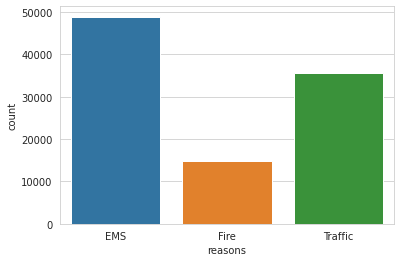

In [0]:
sns.countplot(data=df,x=df.reasons,)

**Let us begin to focus on time information**

In [0]:
df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'reasons'],
      dtype='object')

In [0]:
type(df.timeStamp[0])

str

**A.To convert the timeStamp col from strings to DateTime objects**

In [0]:
df.timeStamp = pd.to_datetime(df.timeStamp)

In [0]:
type(df.timeStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
df.timeStamp[0]

Timestamp('2015-12-10 17:40:00')

In [0]:
time = df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

**B.Grabing the date, hour, month and day of week**

In [0]:
df["hour"]=df.timeStamp.apply(lambda x: x.hour)
df.hour.head(3)

0    17
1    17
2    17
Name: hour, dtype: int64

In [0]:
df["date"]=df.timeStamp.apply(lambda x: x.date())
df.date.head(3)

0    2015-12-10
1    2015-12-10
2    2015-12-10
Name: date, dtype: object

In [0]:
df["month"]=df.timeStamp.apply(lambda x: x.month)
df.month.head(3)

0    12
1    12
2    12
Name: month, dtype: int64

In [0]:
df["day"]=df.timeStamp.apply(lambda x: x.day)
df.day.head(3)

0    10
1    10
2    10
Name: day, dtype: int64

In [0]:
df["dayofweek"] = df.timeStamp.apply(lambda x:x.dayofweek)
df.dayofweek.head(3)

0    3
1    3
2    3
Name: dayofweek, dtype: int64

**C.Day of Week is an integer 0-6 mapping this to Sundayto Saturday**

In [0]:
dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [0]:
df["dayofweek"] = df.dayofweek.map(dict)
df.dayofweek.head(3)

0    Thu
1    Thu
2    Thu
Name: dayofweek, dtype: object

**Lets use seaborn to create a countplot for the Day of Week column and Month with the hue based off of the Reason column**

Text(0.5, 1.0, 'Daywise report')

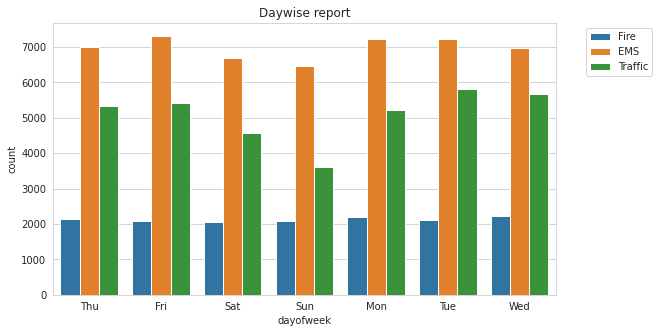

In [0]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x="dayofweek",hue="reasons",hue_order=["Fire","EMS","Traffic"])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Daywise report")

Text(0.5, 1.0, 'Monthwise report')

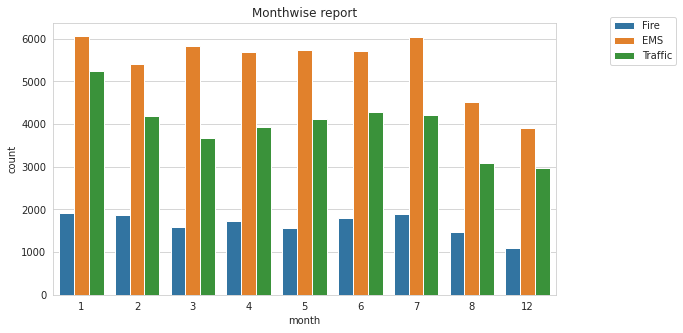

In [0]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x="month",hue="reasons",hue_order=["Fire","EMS","Traffic"])
plt.legend(bbox_to_anchor=(1.25,1.04),loc="best")
plt.title("Monthwise report")


**There are some missing data hence to overcome this visualisation defect lets create a plot**

**A simple plot for the dataframe indicating the count of calls per month**

In [0]:
Month = df.groupby("month").count()
Month.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,date,day,dayofweek
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101


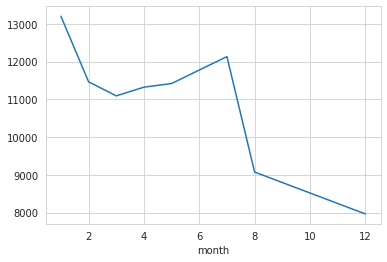

In [0]:
Month.twp.plot()

**Creating a linear fit on the number of calls per month**

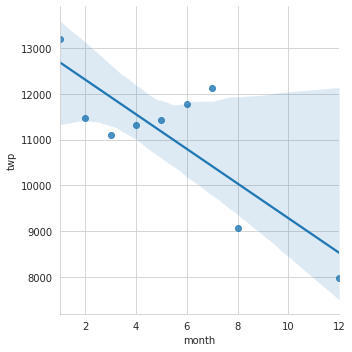

In [0]:
sns.lmplot(x='month',y='twp',data=Month.reset_index())

**Call volume by**

In [0]:
df.date.head(5)

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

In [0]:
df.date.tail(5)

99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, dtype: object

**Inference: start date: 2015-12-10  and end date: 2016-08-24**


In [0]:
grpdate = df.groupby(["date"]).count()["twp"]

In [0]:
grpdate

date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    388
2016-08-23    439
2016-08-24    132
Name: twp, Length: 259, dtype: int64

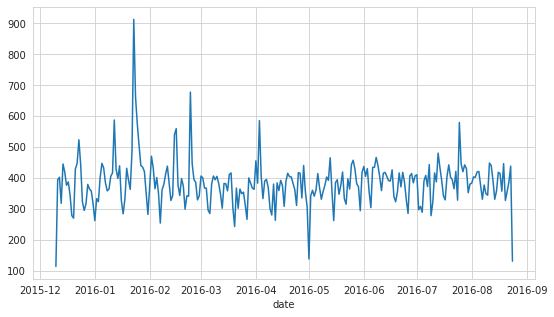

In [0]:
plt.figure(figsize=(9,5))
df.groupby(["date"]).count()["twp"].plot()


**3 separate plots with each plot representing a Reason for the 911 call**

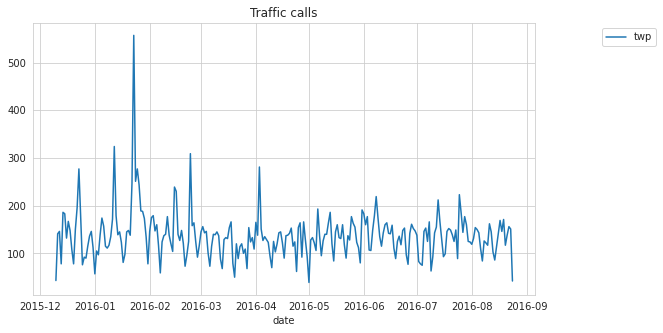

In [0]:
plt.figure(figsize=(9,5))
df[df["reasons"]=="Traffic"].groupby("date").count()["twp"].plot()

plt.title("Traffic calls")
plt.legend(bbox_to_anchor=(1.25, 1))

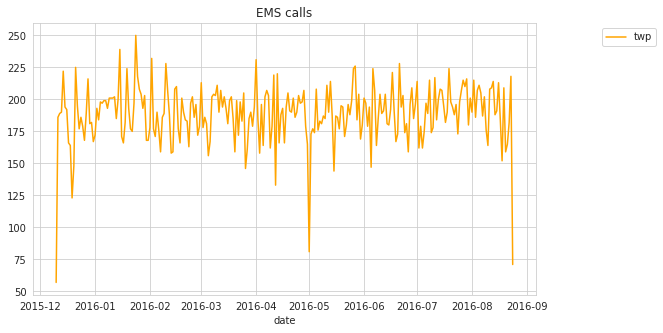

In [0]:
plt.figure(figsize=(9,5))
df[df["reasons"]=="EMS"].groupby("date").count()["twp"].plot(color="orange")

plt.title("EMS calls")
plt.legend(bbox_to_anchor=(1.25, 1))

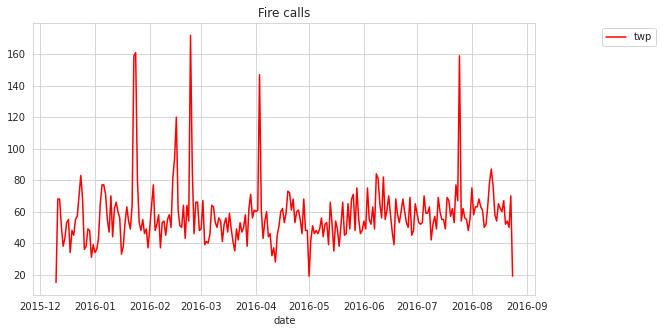

In [0]:
plt.figure(figsize=(9,5))
df[df["reasons"]=="Fire"].groupby("date").count()["twp"].plot(color="Red")

plt.title("Fire calls")
plt.legend(bbox_to_anchor=(1.25, 1))

# Successfully anlysed various features of 911 calls